<a href="https://colab.research.google.com/github/CALDISS-AAU/sdsphd20/blob/master/notebooks/thu26/Intro_to_nlp_and_supervised_tasks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Intro To NLP vs. Supervised ML

Roman Jurowetzki, Aalborg University In part based on the Intro from the DeepNLP course by Dan Anastasyev - https://github.com/DanAnastasyev/DeepNLP-Course

In this notebook we are going to explore supervised ML as used on vectorised text input. This is probably the most common application when working with NLP today and very useful if you want to generate (predict) indicators from text data for further exploration (e.g. simple statistical or econometric analysis)

We are going to use a (VERY!) standard dataset of movie reviews from IMDB and try solve a binary classification problem - is the movie good or bad. This is certainly a oversimplification but appropriate given the timeframe and that this here is an intro...

![alt text](https://media.giphy.com/media/7jNeb9CVSgyUE/giphy.gif)

In this tutorial we will be using the well known IMDB movie review dataset for simple classification with different vectorization techniques:


*   Simple bag-of-words
*   TF-IDF
*   LSI / SVD


We will also look at some more recent approaches to model explainability i.e. "Why did the model decide this or that?"


Finally, we will look at a simple approach to building a **semantic search** based on vector-similarity.


In [1]:
!pip -q install eli5 #installing a great package for explaining ML models

     |████████████████████████████████| 112kB 7.7MB/s 


In [2]:
import pandas as pd
import numpy as np

In [4]:
# data = pd.read_csv("https://github.com/CALDISS-AAU/sdsphd20/raw/master/datasets/imdb.zip", sep="\t")

In [5]:
data = pd.read_csv("https://github.com/RJuro/nlp-intro-cuny/raw/master/images/imdb.zip", sep="\t")


In [6]:
data.head()

,is_positive,review
0,0,"Dreamgirls, despite its fistful of Tony wins i..."
1,0,This show comes up with interesting locations ...
2,1,I simply love this movie. I also love the Ramo...
3,0,Spoilers ahead if you want to call them that.....
4,1,My all-time favorite movie! I have seen many m...


In [8]:
# some basic text cleaning, removing HTML fragments (only a problem here)

import re

pattern = re.compile('<br /><br />')

print(data['review'].iloc[3])
print(pattern.subn(' ', data['review'].iloc[3])[0])

Spoilers ahead if you want to call them that...<br /><br />I would almost recommend this film just so people can truly see a 1/10. Where to begin, we'll start from the top...<br /><br />THE STORY: Don't believe the premise - the movie has nothing to do with abandoned cars, and people finially understanding what the mysterious happenings are. It's a draub, basic, go to cabin movie with no intensity or "effort".<br /><br />THE SCREENPLAY: I usually give credit to indie screenwriters, it's hard work when you are starting out...but this is crap. The story is flat - it leaves you emotionless the entire movie. The dialogue is extremely weak and predictable boasting lines of "Woah, you totally freaked me out" and "I was wondering if you'd uh...if you'd like to..uh, would you come to the cabin with me?". It makes me want to rip out all my hair, one strand at a time and feed it to myself.<br /><br />THE CHARACTERS: HOLY CRAP!!!! Some have described the characters as flat, I want to take it one 

In [9]:
# application of the cleaning mask to everthing

data['review'] = data['review'].apply(lambda text: pattern.subn(' ', text)[0])
data['review'] = data['review'].apply(lambda text: pattern.subn(' ', text)[0])

## Approach 1 - Sklearn
If you don't want to deal with language or much code you can just do that

In [10]:
# module to split data into training / test
from sklearn.model_selection import train_test_split

In [11]:
# define in and outputs

X = data['review'].values
y = data['is_positive'].values

In [12]:
# Split the data in 80% trainig 20% test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=18)

In [13]:
# Simple BoW vectorizer
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
X_train_vec_1 = vectorizer.fit_transform(X_train)

In [14]:
# Instantiate a logistic regression model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=2000)

In [15]:
# Train the model

model.fit(X_train_vec_1, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=2000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [16]:
# Transform the test-set
X_test_vec_1 = vectorizer.transform(X_test)

In [17]:
# Check performance of the model
model.score(X_test_vec_1, y_test)

0.864

In [18]:
# Predict on new data

y_pred = model.predict(X_test_vec_1)

In [19]:
# confusion matrix by hand... :-)

pd.crosstab(y_test, y_pred)

col_0,0,1
row_0,,
0,2151,381
1,299,2169


In [20]:
# Or TFIDF
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
X_train_vec_2 = vectorizer.fit_transform(X_train)

model = LogisticRegression(max_iter=2000)

# Train the model

model.fit(X_train_vec_2, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=2000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [21]:
# Transform the test-set
X_test_vec_2 = vectorizer.transform(X_test)

In [22]:
# Check performance of the model
model.score(X_test_vec_2, y_test)

0.878

In [23]:
import eli5
eli5.show_weights(model, feature_names=vectorizer.get_feature_names(), target_names=['negative','positive'], top=20)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.feature_selection.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection. Anything that cannot be imported from sklearn.feature_selection is now part of the private API.
  warnings.warn(message, FutureWarning)


In [25]:
X_test[0]

'To call this anything at all would be an insult to everything else. Some expletives might describe it, but still too positively. Normally one ignores this kind of rubbish, but it was so stupid that one can but despair. Would have though that even Americans and commercial TV-stations would have given this piece of s**t a miss. But as the Germans say: Gegen die Dummheit kaempfen die Goetter selbst Vergebens!'

In [24]:
eli5.show_prediction(model, X_test[0], vec=vectorizer, target_names=['negative','positive'])

In [27]:
preds_array = model.predict_proba(X_test_vec_2)

In [28]:
preds_array[:,1]

array([0.05569606, 0.75111603, 0.0046351 , ..., 0.1300077 , 0.54654214,
       0.95919924])

In [29]:
predsDF = pd.DataFrame({'text':X_test, 'pred_pos':preds_array[:,1], 'y_test':y_test})

In [42]:
predsDF['diff_error'] =  predsDF.pred_pos - predsDF.y_test

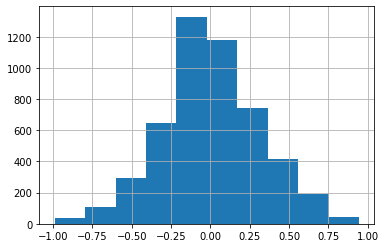

In [43]:
predsDF.diff_error.hist()

In [38]:
predsDF.sort_values('diff_error', ascending=True).iloc[0,0]

"This is simply the funniest movie I've seen in a long time. The bad acting, bad script, bad scenery, bad costumes, bad camera work and bad special effects are so stupid that you find yourself reeling with laughter. So it's not gonna win an Oscar but if you've got beer and friends round then you can't go wrong."

In [39]:
# Let's fire up spacy

import spacy

# and load the small english language model. Large models can be downloaded for many languages.
nlp = spacy.load("en")

# find more models for other languages here: https://spacy.io/models/

In [46]:
X_test[1]

'I like this film for several reasons. I have a soft spot for films about intricately plotted criminal plots like TOPKAPI. I also enjoy films (like TOPKAPI and BIG DEAL ON MADONNA STREET) that spoof the the genre. One of the best ones is DISORGANIZED CRIME. Corbin Bernsen has met four cons over the years, and he decides they can all be useful in a bank robbery he is planning in a small Montana town. But he hasn\'t given any details on the crime to the fellows, nor do they really know each other at all. Shortly after he sends for them Bernsen is arrested by two New Jersey policemen (Ed O\'Neill and Daniel Roebuck) whom he escaped from before and have a warrant to bring him back. While he is in their custody the four cons (Fred Gwynne, Lou Diamond Philips, Ruben Blades, and Will Russ) show up without a clue about why they are there except that Bernsen was planning something.  The first twenty minutes of the film deal with the four cons slowly getting used to each other, with Gwynne and P

In [44]:
doc = nlp(X_test[1])

Spacy docs have POS (part of speech) and ENT (entity anotation) - let's see how we can use that to filter (bootstrap) a nice dictionary for future use.

In [45]:
# let's look at the POS tags
[(tok.text, tok.pos_) for tok in doc]

[('I', 'PRON'),
 ('like', 'VERB'),
 ('this', 'DET'),
 ('film', 'NOUN'),
 ('for', 'ADP'),
 ('several', 'ADJ'),
 ('reasons', 'NOUN'),
 ('.', 'PUNCT'),
 ('I', 'PRON'),
 ('have', 'AUX'),
 ('a', 'DET'),
 ('soft', 'ADJ'),
 ('spot', 'NOUN'),
 ('for', 'ADP'),
 ('films', 'NOUN'),
 ('about', 'ADP'),
 ('intricately', 'ADV'),
 ('plotted', 'VERB'),
 ('criminal', 'ADJ'),
 ('plots', 'NOUN'),
 ('like', 'SCONJ'),
 ('TOPKAPI', 'PROPN'),
 ('.', 'PUNCT'),
 ('I', 'PRON'),
 ('also', 'ADV'),
 ('enjoy', 'VERB'),
 ('films', 'NOUN'),
 ('(', 'PUNCT'),
 ('like', 'SCONJ'),
 ('TOPKAPI', 'PROPN'),
 ('and', 'CCONJ'),
 ('BIG', 'PROPN'),
 ('DEAL', 'PROPN'),
 ('ON', 'ADP'),
 ('MADONNA', 'PROPN'),
 ('STREET', 'PROPN'),
 (')', 'PUNCT'),
 ('that', 'DET'),
 ('spoof', 'VERB'),
 ('the', 'DET'),
 ('the', 'DET'),
 ('genre', 'NOUN'),
 ('.', 'PUNCT'),
 ('One', 'NUM'),
 ('of', 'ADP'),
 ('the', 'DET'),
 ('best', 'ADJ'),
 ('ones', 'NOUN'),
 ('is', 'AUX'),
 ('DISORGANIZED', 'PROPN'),
 ('CRIME', 'PROPN'),
 ('.', 'PUNCT'),
 ('Corbin', 

In [47]:
# Let's tokenize the first 2000 articles (that should take around 1 minute with this approach)
tokenlist = []
for doc in nlp.pipe(X_train[:2000]):
  tokens =[tok.text.lower() for tok in doc if tok.pos_ in ['NOUN','ADJ','ADV','VERB'] and not tok.is_stop]
  tokenlist.append(tokens)

In [48]:
from gensim.corpora.dictionary import Dictionary

In [49]:
dictionary = Dictionary(tokenlist)

In [52]:
len(dictionary)

18720

In [53]:
dictionary.filter_extremes(no_below=5, no_above=0.2)

In [54]:
len(dictionary)

4871

In [55]:
vectorizer = TfidfVectorizer(vocabulary=list(dictionary.values()))
X_train_vec_2 = vectorizer.fit_transform(X_train)

model = LogisticRegression(max_iter=2000)

# Train the model

model.fit(X_train_vec_2, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=2000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [56]:
X_test_vec_2 = vectorizer.fit_transform(X_test)

In [57]:
# Check performance of the model
model.score(X_test_vec_2, y_test)

0.8634

In [58]:
eli5.show_weights(model, feature_names=vectorizer.get_feature_names(), target_names=['negative','positive'], top=20)

In [59]:
eli5.show_prediction(model, X_test[0], vec=vectorizer, target_names=['negative','positive'])

In [60]:
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.decomposition import TruncatedSVD
from sklearn.neural_network import MLPClassifier

tfidf = TfidfVectorizer(vocabulary=list(dictionary.values()))
svd = TruncatedSVD(n_components=100, n_iter=7, random_state=42)
clf = MLPClassifier(verbose=False)


pipe = make_pipeline(tfidf, svd, clf)

pipe.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Pipeline(memory=None,
         steps=[('tfidfvectorizer',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token...
                               batch_size='auto', beta_1=0.9, beta_2=0.999,
                               early_stopping=False, epsilon=1e-08,
                               hidden_layer_sizes=(100,),
                               learning_rate='constant',
                               learning_rat

In [61]:
pipe.score(X_test, y_test)

0.8344

In [62]:
from eli5.lime import TextExplainer

te = TextExplainer(random_state=42)
te.fit(X_test[0], pipe.predict_proba)
te.show_prediction(target_names=['negative','positive'])

## Semantic search

Once you obtain dense vectors that represent your text you can calculate distance measures. Where distance is not high, you will probably find texts that are semantically similar... :-)

This can be done by calculating all distances in the corpus (which would be rather inefficient) or by using nearest-neighbor approximation.

We will be using Annoy, a popular technique for finding neighbors developed at spotify (to find similar songs)
https://github.com/spotify/annoy


In [63]:
!pip install annoy

     |████████████████████████████████| 655kB 8.4MB/s 
  Created wheel for annoy: filename=annoy-1.17.0-cp36-cp36m-linux_x86_64.whl size=390366 sha256=610438e236f05e751ebcdb3ea87734324115b7c2583c037eb010145069d0d036
  Stored in directory: /root/.cache/pip/wheels/3a/c5/59/cce7e67b52c8e987389e53f917b6bb2a9d904a03246fadcb1e
Successfully built annoy


Let's first vectorise our texts. For this we will be using Gensim, as it provides a more language-oriented approach as well as a good interlude into topic modelling...

In [64]:
# Import the dictionary builder
from gensim.corpora.dictionary import Dictionary

# Import the TfidfModel from Gensim
from gensim.models.tfidfmodel import TfidfModel

# Just like before, we import the model
from gensim.models.lsimodel import LsiModel

# Tooling to map between corpus (gensim) and matrix - more general
from gensim.matutils import corpus2csc, corpus2dense

In [65]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [66]:
# Generate a dictionary and filter
dictionary = Dictionary(tokenlist)
dictionary.filter_extremes(no_below=5, no_above=0.2)

In [67]:
# construct corpus using this dictionary
corpus = [dictionary.doc2bow(word_tokenize(doc.lower())) for doc in data['review']]

In [69]:
# Create and fit a new TfidfModel using the corpus: tfidf
tfidf = TfidfModel(corpus)

In [70]:
# transform corpus to TFIDF
corpus_tfidf = tfidf[corpus]

In [72]:
# Training the LSI model
model_lsi = LsiModel(corpus_tfidf, num_topics = 300, id2word=dictionary)

In [73]:
# Generating the corpus train & test

corpus_lsi = model_lsi[corpus_tfidf]

In [74]:
# turn into matrix
corpus_lsi_matrix = corpus2dense(corpus_lsi, 300 )

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:502: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  result = np.column_stack(sparse2full(doc, num_terms) for doc in corpus)


In [75]:
corpus_lsi_matrix.shape

(300, 25000)

In [76]:
corpus_lsi_matrix = corpus_lsi_matrix.T

In [77]:
from annoy import AnnoyIndex

In [78]:
f = 300

t = AnnoyIndex(f, 'angular')  # Length of item vector that will be indexed

for i in range(len(corpus_lsi_matrix)):
    t.add_item(i, corpus_lsi_matrix[i])

In [79]:
t.build(10)

True

In [80]:
t.get_nns_by_item(0, 10)

[0, 2976, 24134, 4181, 1537, 2719, 23898, 14519, 6700, 7139]

In [82]:
data['review'][0]

'Dreamgirls, despite its fistful of Tony wins in an incredibly weak year on Broadway, has never been what one would call a jewel in the crown of stage musicals. However, that is not to say that in the right cinematic hands it could not be fleshed out and polished into something worthwhile on-screen. Unfortunately, what transfers to the screen is basically a slavishly faithful version of the stage hit with all of its inherent weaknesses intact. First, the score has never been one of the strong points of this production and the film does not change that factor. There are lots of songs (perhaps too many?), but few of them are especially memorable. The closest any come to catchy tunes are the title song and One Night Only - the much acclaimed And I Am Telling You That I Am Not Going is less a great song than it is a dramatic set piece for the character of Effie (Jennifer Hudson). The film is slick and technically well-produced, but the story and characters are surprisingly thin and lacking

In [83]:
data['review'][t.get_nns_by_item(0, 10)]

0        Dreamgirls, despite its fistful of Tony wins i...
2976     Higher and Higher was one of Rodgers&Hart's le...
24134    It'd be easy to call Guys and Dolls great. It'...
4181     Jennifer Jason Leigh and Mare Winningham are a...
1537     "Hollywood Hotel" has relationships to many fi...
2719     The great cinematic musicals were made between...
23898    Nathan Detroit runs illegal craps games for hi...
14519    {Possible spoilers coming up... you've been fo...
6700     What makes for Best Picture material? The Osca...
7139     The Stock Market Crash of 1929 and the Depress...
Name: review, dtype: object